# Desafio - Instruções

* Com o conjunto de dados sobre *câncer de mama*, utilize a célula seguinte com os dados carregados e divididos e **obtenha o melhor desempenho em um balanceamento das métricas**. 

* O modelo criado por você deverá ser *testado no conjunto de teste X_test e y_test*. 

* *O conjunto data_train e target_train poderá ser utilizado para escolher os melhores parâmetros e validar o modelo.*

* Organize e **tenha cuidado** para que seu experimento execute um *protocolo de validação que faça sentido*.

Mais informações sobre esse conjunto de dados poderão ser obtidas em: 
[https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset](http://)

In [10]:
# importando o dados
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
data = breast_cancer.data
target = breast_cancer.target

In [11]:
# separando os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test_original, y_train, y_test_original = train_test_split(data, target, test_size=0.2, random_state=42)

# separando o conjunto de treino em validação também
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
# treinando o modelo 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# avaliando o modelo
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("Acurácia: ", accuracy_score(y_test, y_pred))

Acurácia:  0.945054945054945


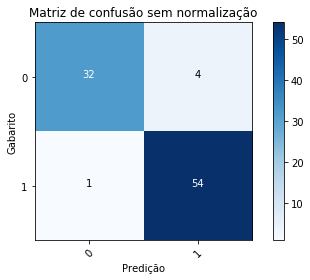

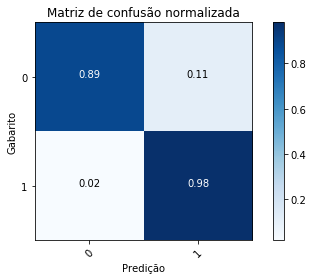

In [13]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusão',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Gabarito')
    plt.xlabel('Predição')
    plt.tight_layout()


# calcula a matriz de confusão
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# não normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=np.unique(breast_cancer.target),
                      title='Matriz de confusão sem normalização')

# normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=np.unique(breast_cancer.target), normalize=True,
                      title='Matriz de confusão normalizada')

plt.show()

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.93      0.98      0.96        55

   micro avg       0.95      0.95      0.95        91
   macro avg       0.95      0.94      0.94        91
weighted avg       0.95      0.95      0.94        91



In [15]:
best_model = None
best_accuracy = 0

for k in [1,2,3,4,5]:

    knn = KNeighborsClassifier(n_neighbors = k) # a cada passo, o parâmetro assume um valor
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('K:', k, '- ACC:', acc)
    
    if acc > best_accuracy:
        best_model = knn
        best_accuracy = acc
        
y_pred = best_model.predict(X_test_original)
acc = accuracy_score(y_test_original, y_pred)

print()
print('Melhor modelo:')
print('K:', best_model.get_params()['n_neighbors'], '- ACC:', acc * 100)

print(classification_report(y_test_original, y_pred))

K: 1 - ACC: 0.9340659340659341
K: 2 - ACC: 0.9230769230769231
K: 3 - ACC: 0.945054945054945
K: 4 - ACC: 0.9230769230769231
K: 5 - ACC: 0.945054945054945

Melhor modelo:
K: 3 - ACC: 92.10526315789474
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        43
           1       0.91      0.97      0.94        71

   micro avg       0.92      0.92      0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114

